Read data from csv

In [35]:
from pandas import read_csv
filename = 'dataset//earnings_split/EAR_4MMN_CUR_NB_A-filtered-2021-03-21.csv'
df_incomes_columns_csv = ["ref_area.label","classif1.label","time","obs_value"]
df_incomes_columns_names = ["Country","Currency","Year","Income"]
df_incomes = read_csv(filename,usecols=df_incomes_columns_csv)
df_incomes = df_incomes[(df_incomes["classif1.label"]=="Currency: U.S. dollars") & (df_incomes["time"]>2009)].drop("classif1.label", axis=1)

df_incomes = df_incomes.rename(columns={k:v for k,v in zip(df_incomes_columns_csv,df_incomes_columns_names)})
df_incomes.head()

In [ ]:
from pandas import merge as pd_merge
filename = 'dataset//earnings_split/EAR_4MTH_SEX_ECO_CUR_NB_A-filtered-2021-03-21.csv'
df_field_incomes_columns_csv = ["ref_area.label","classif1.label","classif2.label","time","obs_value"]
df_field_incomes_columns_names = ["Country","Field","Currency","Year","Income"]
df_field_incomes = read_csv(filename,usecols=df_field_incomes_columns_csv)
df_field_incomes = df_field_incomes[(df_field_incomes["classif2.label"]=="Currency: U.S. dollars") & (df_field_incomes["time"]>2009)].drop("classif2.label", axis=1)

df_field_incomes = df_field_incomes.rename(columns={k:v for k,v in zip(df_field_incomes_columns_csv,df_field_incomes_columns_names)})
df_avg_income = df_field_incomes[df_field_incomes["Field"]=="Economic activity (Aggregate): Total"].drop("Field", axis=1).rename(columns={"Income":"Average Income"})
df_field_incomes["Field"] = list(map(lambda text: text.split(":")[1][1:],df_field_incomes["Field"]))
df_field_incomes = pd_merge(df_field_incomes,df_avg_income, on=["Year", "Country"],how="inner")
df_field_incomes.head()

,Country,Currency,Year,Income
2,Afghanistan,Currency: U.S. dollars,2010,86.11
5,Afghanistan,Currency: U.S. dollars,2011,106.96
8,Afghanistan,Currency: U.S. dollars,2012,98.19
11,Afghanistan,Currency: U.S. dollars,2013,90.29
14,Afghanistan,Currency: U.S. dollars,2015,81.77


In [37]:
filename = 'dataset//living_index//living_index.csv'
indices_columns = ["Country","Cost of Living Index","Year", "Local Purchasing Power Index"]
df_indices = read_csv(filename,usecols=indices_columns)
indices_by_country = [dfCountry  for country,dfCountry in df_indices.groupby('Country')]

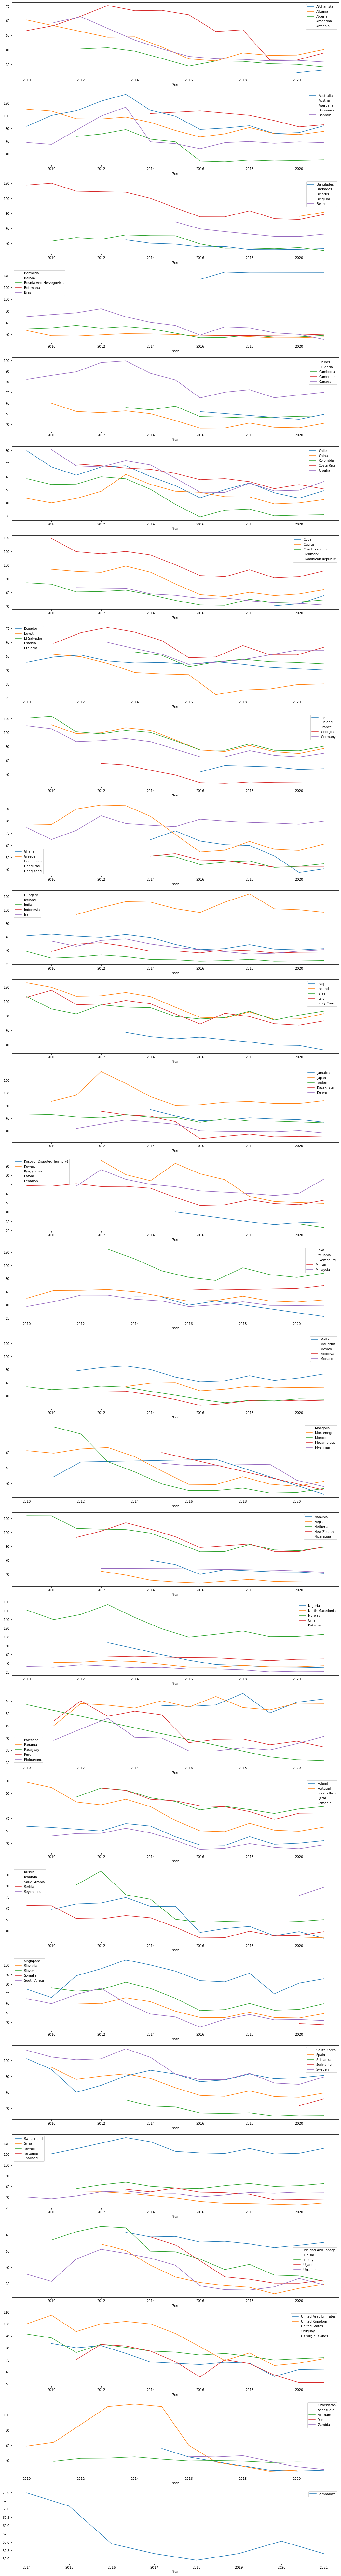

In [ ]:
from math import ceil
import matplotlib.pyplot as plt
def draw_df_by_groups(dfs,x_name,y_name,legend,groupSize=5):
    plots_count = len(dfs)
    plot_groups = int(ceil(plots_count/groupSize))
    fig, axs = plt.subplots(plot_groups,figsize=(18, plot_groups*5))
    for i in range(plots_count):
        dfs[i].plot(x=x_name,y=y_name,ax=axs[i//groupSize])
        if i%groupSize == groupSize-1 or i==plots_count-1:
            axs[i//groupSize].legend(legend[i//groupSize*groupSize:i+1])
    fig.show()

Drawing commented out because it takes too much space

In [ ]:
# countries = [country["Country"].values[0] for country in indices_by_country]      
# draw_df_by_groups(indices_by_country,"Year","Cost of Living Index",countries,5)   

## Purchasing power index

In [ ]:
df_indices_income_favg = pd_merge(df_indices,df_field_incomes, on=["Year", "Country"],how="inner")
print("Countries count after merge",df_indices_income_favg["Country"].unique().size)
df_indices_income_favg["Field Purchasing Power Index"] = df_indices_income_favg["Local Purchasing Power Index"]/df_indices_income_favg["Average Income"]*df_indices_income_favg["Income"]
df_indices_income_favg.head()

Countries count after merge 76


,Country,Cost of Living Index,Local Purchasing Power Index,Year,Currency,Income
0,United States,71.05,109.52,2020,Currency: U.S. dollars,1256.67
1,Switzerland,121.16,129.70,2019,Currency: U.S. dollars,3799.85
2,Luxembourg,86.09,106.26,2019,Currency: U.S. dollars,2339.42
3,Japan,83.33,103.12,2019,Currency: U.S. dollars,1359.98
4,Ireland,75.35,95.09,2019,Currency: U.S. dollars,1854.07


In [ ]:
# temporary fix for Poland
# df_indices_income_favg["Income"] =((df_indices_income_favg["Year"]>2017) & (df_indices_income_favg["Country"]=="Poland"))*9*df_indices_income_favg["Income"]+df_indices_income_favg["Income"]

In [ ]:
# Polska/Niemcy/Usa
def plot_groupby(df_groupedby,x_name,y_name,title=""):
    fig, ax = plt.subplots(figsize=(18,18))

    for name, group in df_groupedby:
        group.plot(x=x_name,y=y_name, ax=ax, label=name,title=title)      #kind='kde',
    fig.show()
countries = ["Poland","Germany","United States"]

for country in countries:
    plot_groupby(df_indices_income_favg[df_indices_income_favg['Country'] == country].groupby("Field"),x_name="Year",y_name="Field Purchasing Power Index",title=country)


,Country,Cost of Living Index,Local Purchasing Power Index,Year,Currency,Income,Custom power index param
0,United States,71.05,109.52,2020,Currency: U.S. dollars,1256.67,0.087151
1,Switzerland,121.16,129.70,2019,Currency: U.S. dollars,3799.85,0.034133
2,Luxembourg,86.09,106.26,2019,Currency: U.S. dollars,2339.42,0.045422
3,Japan,83.33,103.12,2019,Currency: U.S. dollars,1359.98,0.075825
4,Ireland,75.35,95.09,2019,Currency: U.S. dollars,1854.07,0.051287


## Fourier tranform

In [44]:
poland_Cost_of_living = df_indices.loc[df_indices['Country'] == "Poland"][["Cost of Living Index","Year"]]

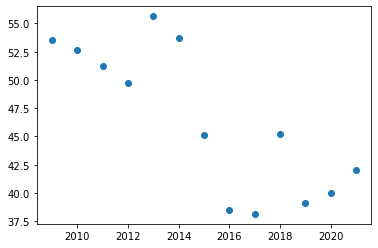

In [45]:
years=poland_Cost_of_living.values[:,1]
cost_of_living_index=poland_Cost_of_living.values[:,0]
plt.plot(years,cost_of_living_index,'o')

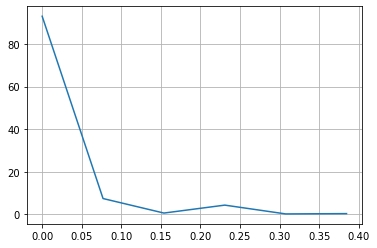

In [46]:
from scipy.fft import fft, fftfreq
import numpy as np
# Number of sample points
N = cost_of_living_index.size
# sample spacing
T = 1
yf = fft(cost_of_living_index)
xf = fftfreq(N, T)[:N//2]
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

## Linear regression

In [47]:
x=poland_Cost_of_living.values[:,1]
y=poland_Cost_of_living.values[:,0]
predict_x = [x for x in range(2009,2026)]

In [48]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [49]:
model = LinearRegression(n_jobs = -1)
model.fit(np.reshape(x,(-1,1)), y)
predicted_y = model.predict(np.reshape(predict_x,(-1,1)))

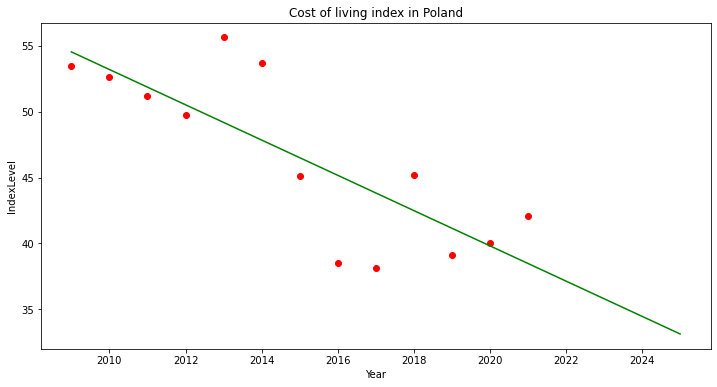

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.scatter(x, y, color = "red")
plt.plot(predict_x, predicted_y, color = "green")
plt.title("Cost of living index in Poland")
plt.xlabel("Year")
plt.ylabel("IndexLevel")
plt.show()

In [51]:
#ToDo regresja wielomianowa

## Cost of living

In [61]:
import os

#pandas_concat_inner
years = [str(year) for year in range(2010, 2021)]
results_by_year = dict(zip(years, [[] for i in range(len(years))]))

directory = "web_scraper/every_item_by_country_in_usd"
    
for file in os.listdir(directory):
    file_path = directory + '/' + file
    print(file[8:12])
    
    results_by_year[file[8:12]].append()

2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013


In [60]:
[[]*10]

[[]]